In [1]:
import pandas as pd
import pysam
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#import re
import sys
#sns.set(style="ticks")
#plt.style.use(u'ggplot')
#%matplotlib inline
sys.path.append("/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/")
#import ecdf, ffind, fgenes

/home/nick/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/nick/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
exac = pd.concat([pd.read_table("/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/resultsFIN.csv", names=['cnv', 'st_bp', 'ed_bp', 'chr', 'length_kb'], skiprows=1).assign(cns="del"),
 pd.read_table("/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/resultsFIN.csv", names=['cnv', 'st_bp', 'ed_bp', 'chr', 'length_kb'], skiprows=1).assign(cns="dup")])
exac.head()

,cnv,st_bp,ed_bp,chr,length_kb,cns
1,del,9009,860859,1,851.850,del
2,del,2541539,3301297,1,759.758,del
3,del,3809806,5921915,1,2112.109,del
4,del,6741735,7720712,1,978.977,del
5,del,12955943,14057042,1,1101.099,del


In [4]:
exac.head()

,cnv,st_bp,ed_bp,chr,length_kb,cns
1,del,9009,860859,1,851.850,del
2,del,2541539,3301297,1,759.758,del
3,del,3809806,5921915,1,2112.109,del
4,del,6741735,7720712,1,978.977,del
5,del,12955943,14057042,1,1101.099,del


Text(0, 0.5, 'Count')

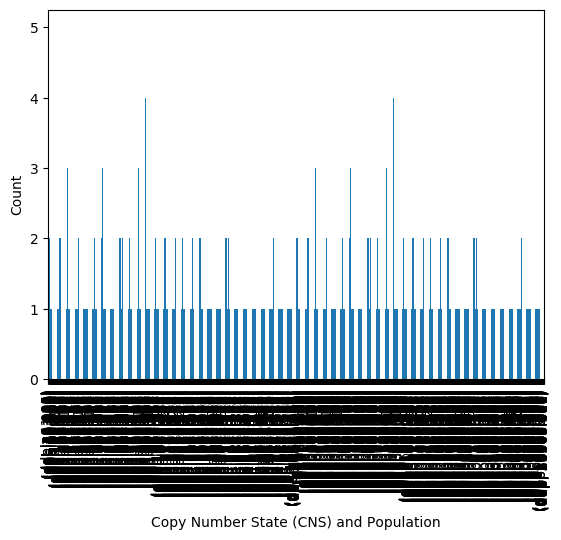

In [4]:
exac.groupby(by=['cns', 'length_kb']).size().plot.bar(stacked=True)
plt.xlabel("Copy Number State (CNS) and Population")
plt.ylabel("Count")

Text(0.5, 1.0, 'CNV counts in each population')

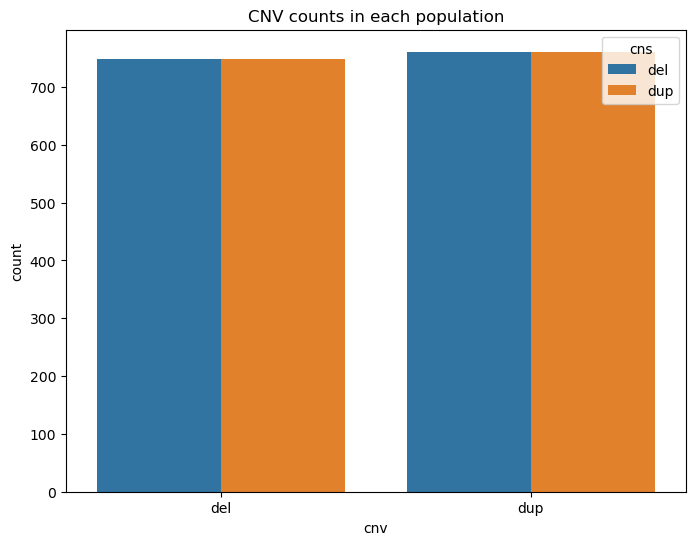

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x="cnv", hue="cns", data=exac)
plt.title("CNV counts in each population")

In [6]:
exac['LogLen_inKb'] = exac.apply(lambda x: np.log10((x['ed_bp']-x['st_bp'])/1000), axis=1)
exac.head()

,cnv,st_bp,ed_bp,chr,length_kb,cns,LogLen_inKb
1,del,9009,860859,1,851.850,del,2.930363
2,del,2541539,3301297,1,759.758,del,2.880675
3,del,3809806,5921915,1,2112.109,del,3.324716
4,del,6741735,7720712,1,978.977,del,2.990772
5,del,12955943,14057042,1,1101.099,del,3.041826


ValueError: int() base must be >= 2 and <= 36, or 0

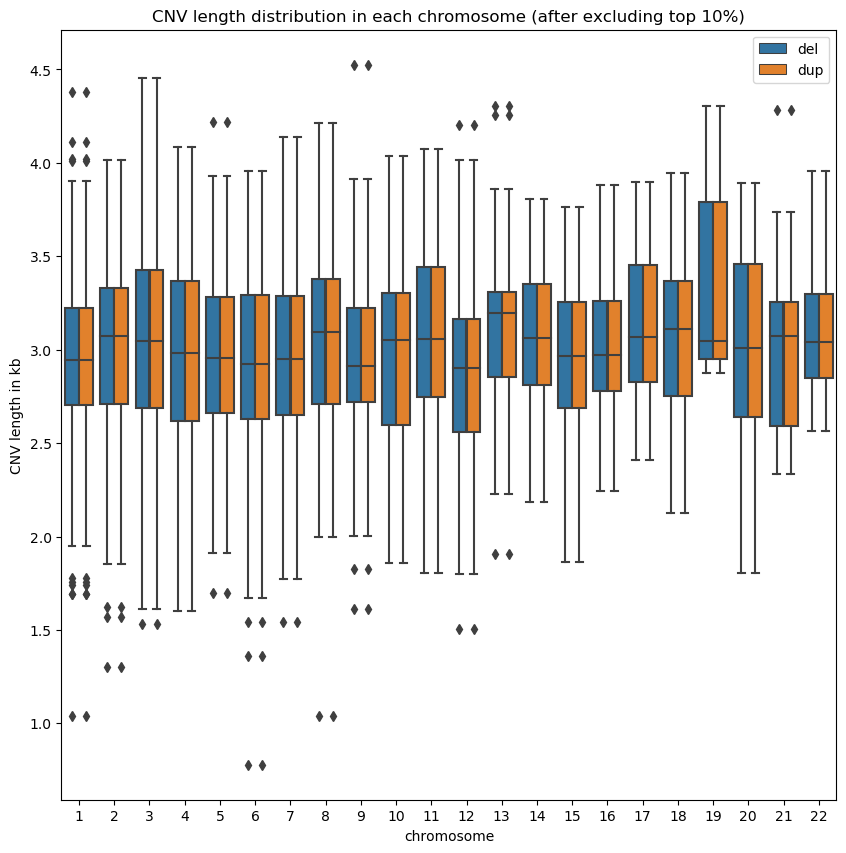

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="chr", y="LogLen_inKb", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("chromosome")
plt.ylabel("CNV length in kb")
plt.title("CNV length distribution in each chromosome (after excluding top 10%)")
plt.ylim(0.5,int(5, 100))

(0, 10819)

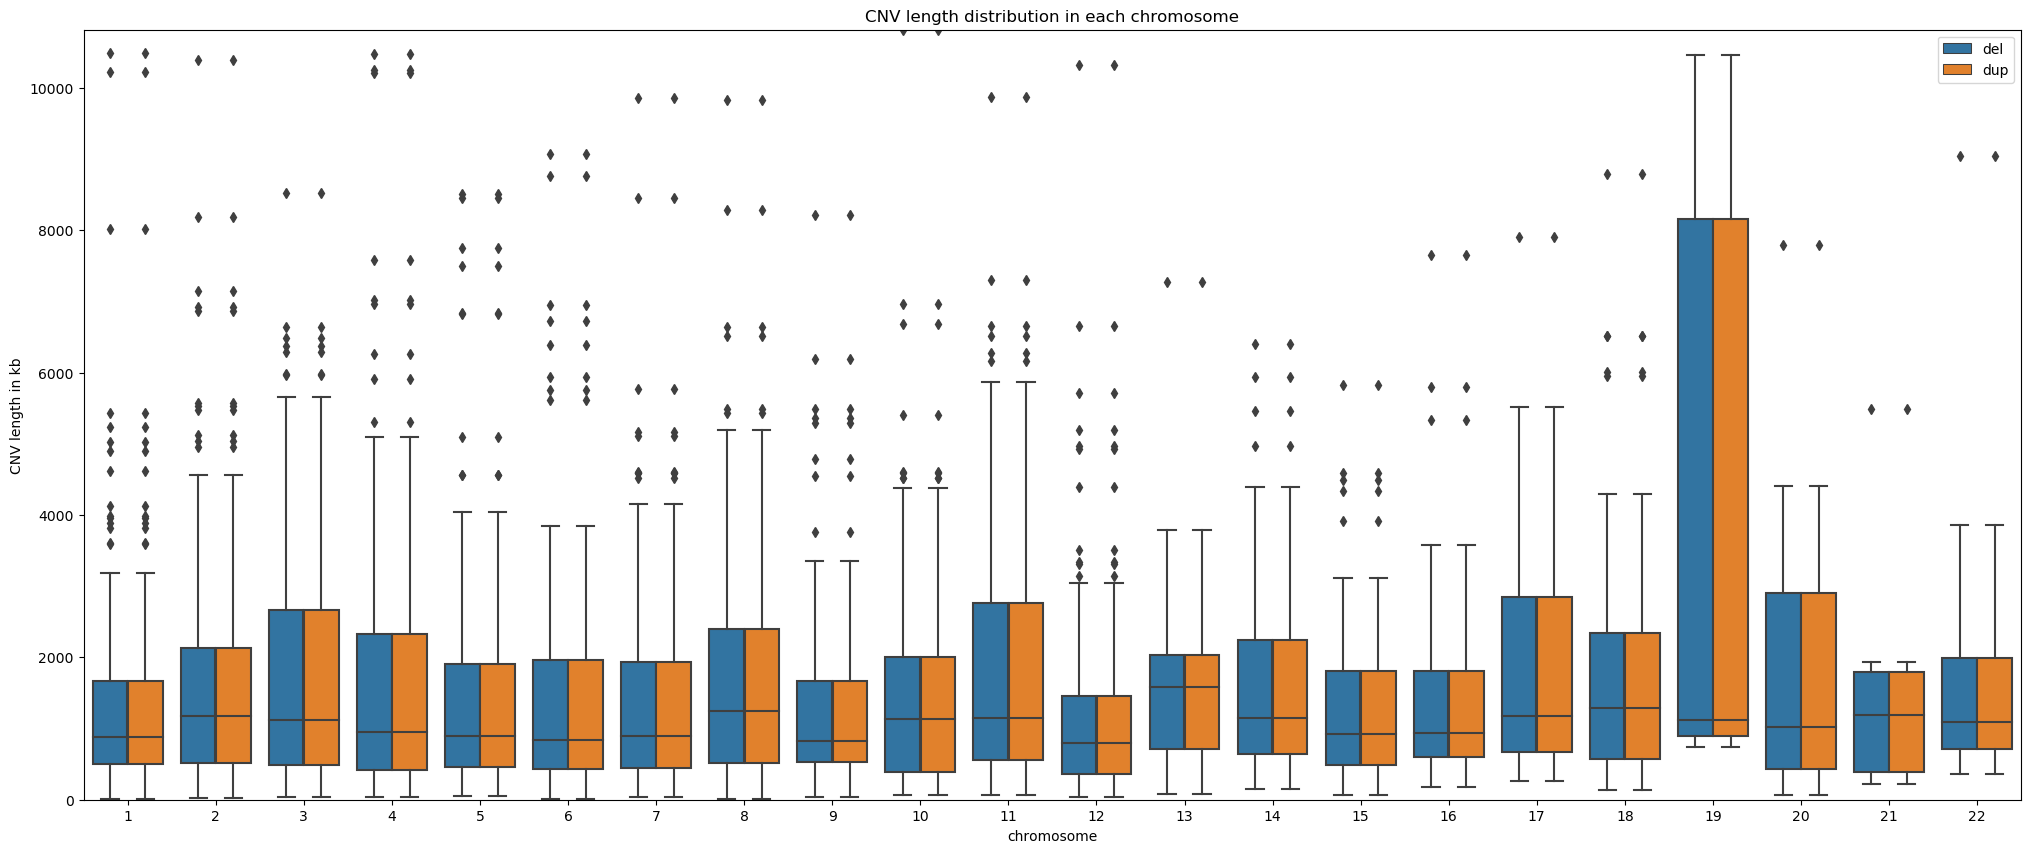

In [44]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="chr", y="length_kb", hue="cns", data=exac)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("chromosome")
plt.ylabel("CNV length in kb")
plt.title("CNV length distribution in each chromosome")
plt.ylim(0,int(np.percentile(exac['length_kb'], 99.05)))

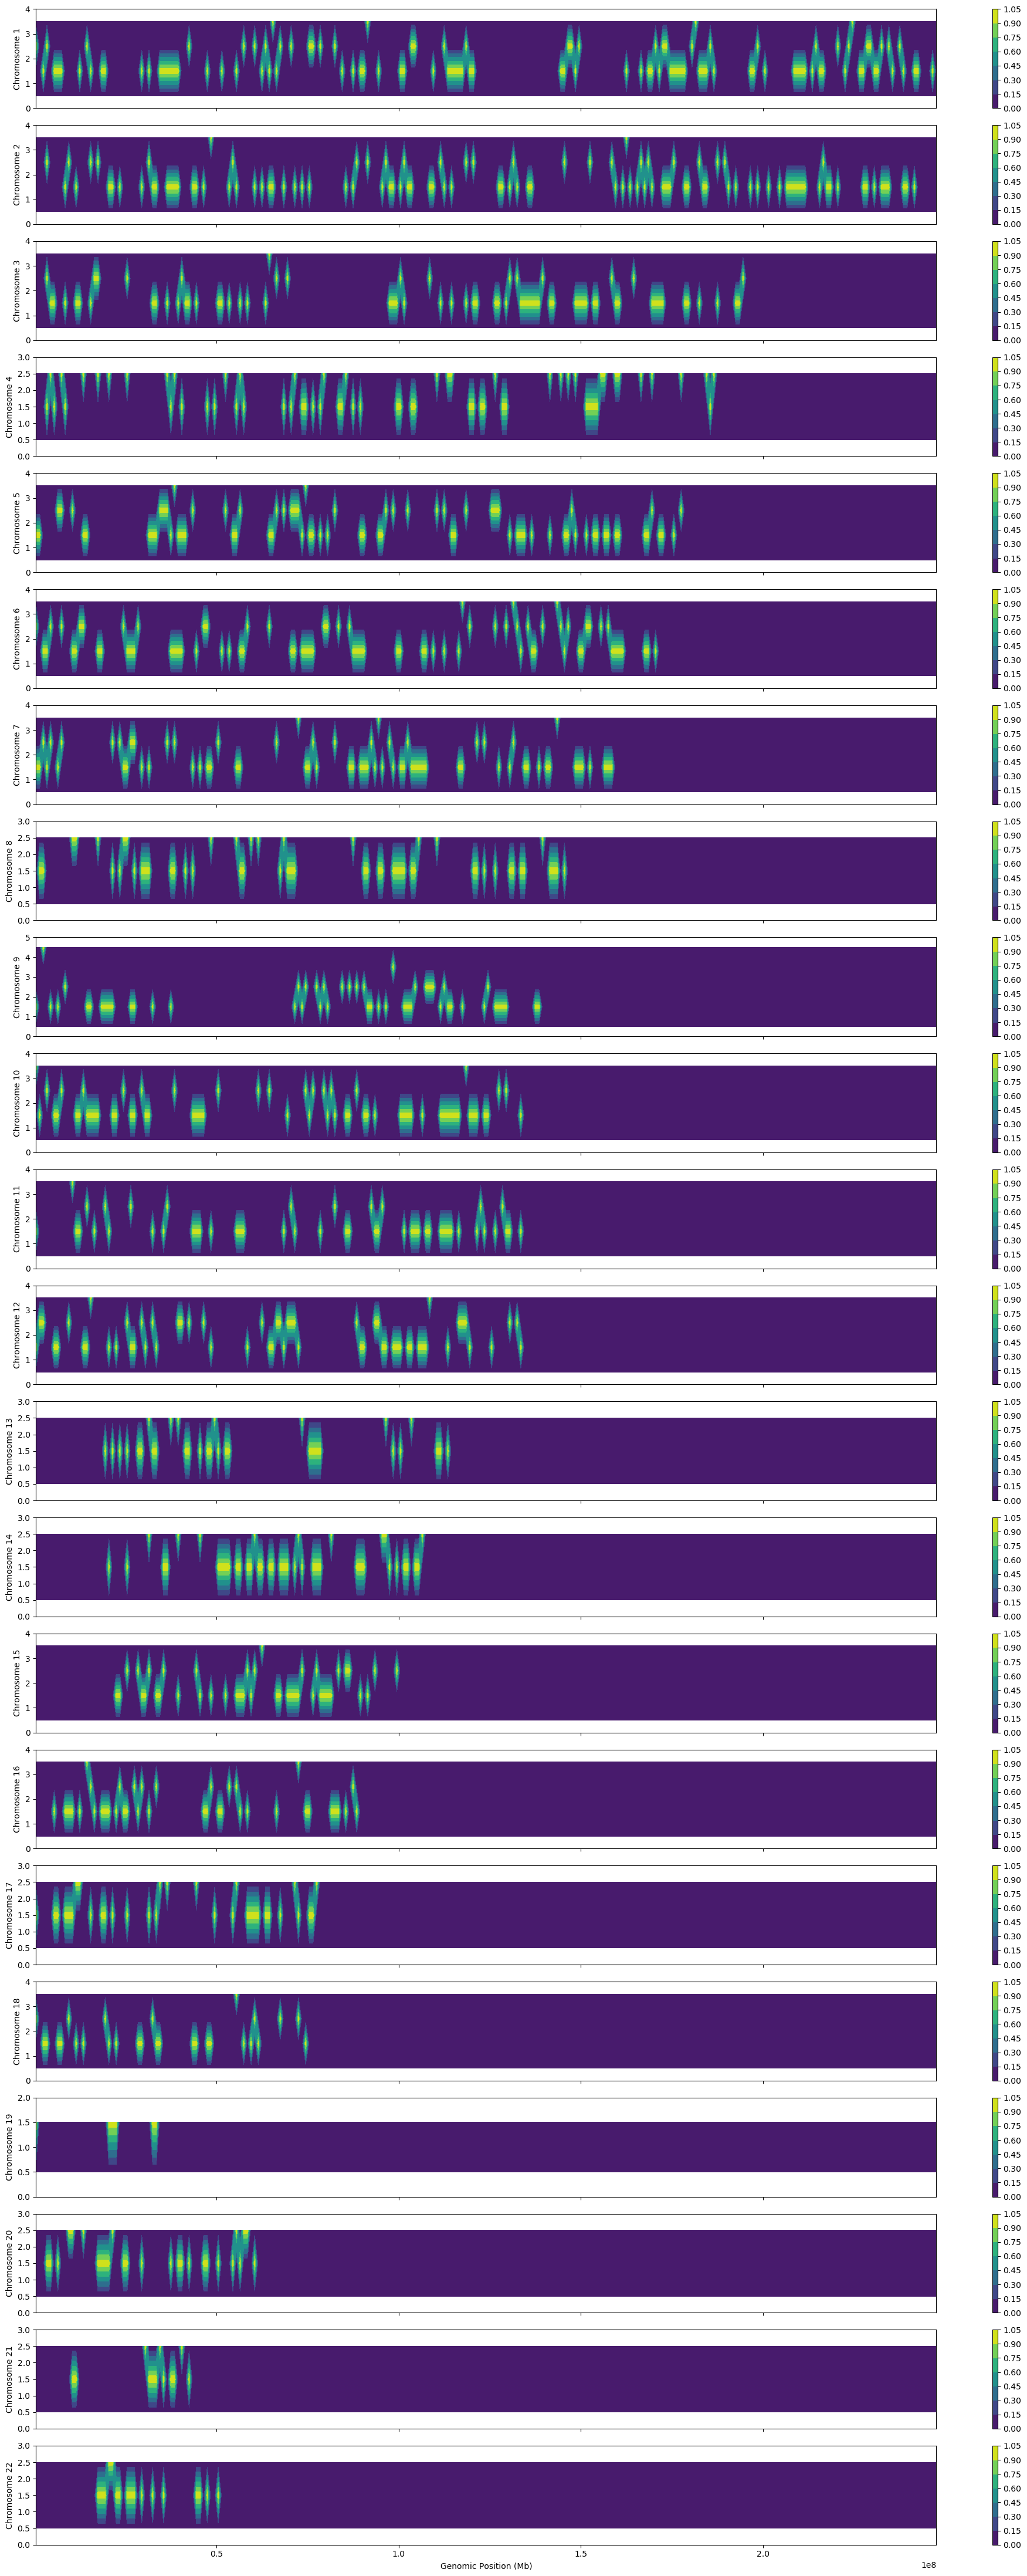

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CNV data
cnv_data = pd.read_csv('/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/All-FInal.csv',sep =',')

# Create a function to plot the contour for CNVs
def plot_cnv_contour():
    # Create a new dataframe to hold the CNV counts
    cnv_data['length'] = cnv_data['end'] - cnv_data['start']
    
    # Bin the data into 1 Mb intervals
    bin_size = 1000000
    cnv_data['start_bin'] = (cnv_data['start'] // bin_size) * bin_size
    cnv_data['end_bin'] = (cnv_data['end'] // bin_size) * bin_size

    # Group by chromosome and start_bin to count CNVs
    cnv_counts = cnv_data.groupby(['chromosome', 'start_bin']).size().reset_index(name='counts')

    # Create a 2D histogram for each chromosome
    chromosomes = cnv_data['chromosome'].unique()
    max_bin = cnv_data['end_bin'].max() + bin_size

    fig, axes = plt.subplots(len(chromosomes), 1, figsize=(20, 2 * len(chromosomes)), sharex=True)
    if len(chromosomes) == 1:
        axes = [axes]  # Ensure axes is always a list

    for i, chrom in enumerate(chromosomes):
        chrom_data = cnv_counts[cnv_counts['chromosome'] == chrom]
        hist, xedges, yedges = np.histogram2d(chrom_data['start_bin'], chrom_data['counts'], bins=[range(0, max_bin, bin_size), range(0, chrom_data['counts'].max() + 2)])

        X, Y = np.meshgrid(xedges[:-1] + bin_size // 2, yedges[:-1] + 0.5)
        Z = hist.T

        ax = axes[i]
        c = ax.contourf(X, Y, Z, cmap='viridis')
        fig.colorbar(c, ax=ax)
        ax.set_ylabel(f'Chromosome {chrom}')
        ax.set_ylim(0, chrom_data['counts'].max() + 1)

    axes[-1].set_xlabel('Genomic Position (Mb)')

    plt.tight_layout()
    plt.show()

# Plot the CNV contour plot
#plt.figure(figsize=(0.1, 0.1))
plot_cnv_contour()

In [6]:
cnv_data = pd.read_csv('/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/All-FInal.csv',sep =',')
print(cnv_data)

      Unnamed: 0 cnv_type     start       end  chromosome  length_kb  \
0              1      del      9009    860859           1    851.850   
1              2      del   2541539   3301297           1    759.758   
2              3      del   3809806   5921915           1   2112.109   
3              4      del   6741735   7720712           1    978.977   
4              5      del  12955943  14057042           1   1101.099   
...          ...      ...       ...       ...         ...        ...   
1504        1526      dup  26043017  27042014          22    998.997   
1505        1527      dup  29083054  32937904          22   3854.850   
1506        1528      dup  35657622  44697652          22   9040.030   
1507        1529      dup  45563518  47117069          22   1553.551   
1508        1530      dup  50151101  51244192          22   1093.091   

      Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 18  \
0            NaN         NaN         NaN         NaN  ...    

KeyboardInterrupt: 

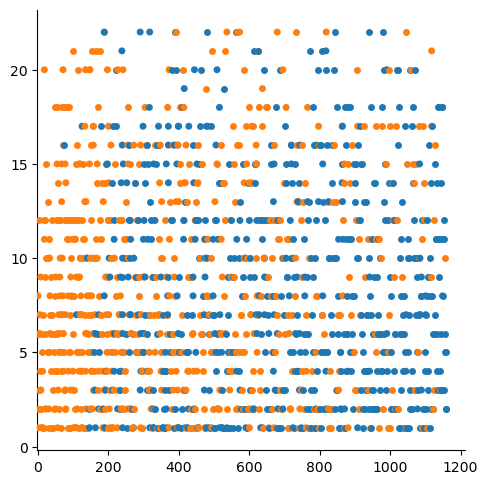

In [7]:
sns.catplot(data = cnv_data, kind="swarm", x='length_kb', y='chromosome', hue=cnv_data['cnv_type'])

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

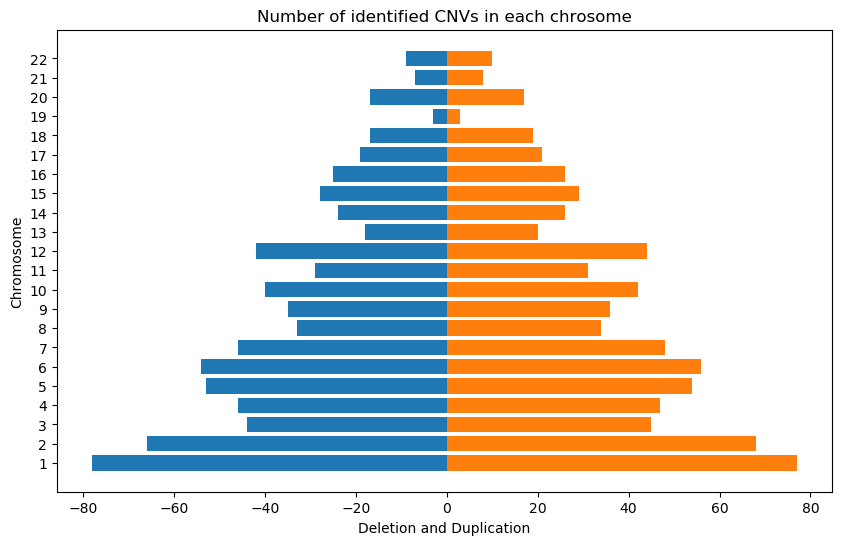

In [14]:
data = pd.DataFrame({
    'Deletion': [78,66,44,46,53,54,46,33,35,40,29,42,18,24,28,25,19,17,3,17,7,9],
    'Duplication': [77,68,45,47,54,56,48,34,36,42,31,44,20,26,29,26,21,19,3,17,8,10]
}, index=['1', '2', '3', '4','5','6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22'])
    
data

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

(l1, x1), (l2,x2) = data.items()

y = range(len(x1))
labels = data.index.tolist()
plt.yticks(y, labels)

plt.barh(y=y, width=-x1)
plt.barh(y=y, width=x2)

ax.set_xlabel('Deletion and Duplication')
ax.set_ylabel('Chromosome')


plt.title('Number of identified CNVs in each chrosome')
plt.show()

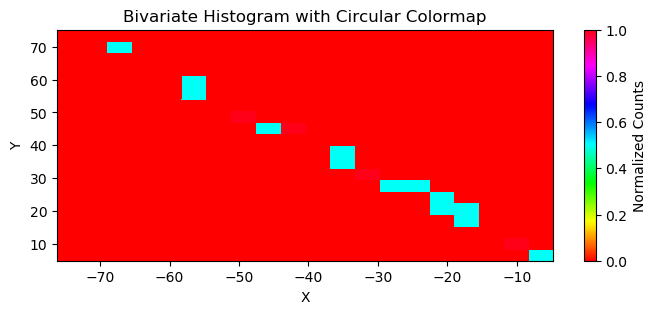

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x= [78,66,44,46,53,54,46,33,35,40,29,42,18,24,28,25,19,17,3,17,7,9]
y= [77,68,45,47,54,56,48,34,36,42,31,44,20,26,29,26,21,19,3,17,8,10]

# Generate sample data
#np.random.seed(0)
#x = np.random.randn(10000)
#y = np.random.randn(10000)

# Create 2D histogram
counts, xedges, yedges = np.histogram2d(x, y, bins=21)

# Create a meshgrid for plotting
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xcenters, ycenters)

# Normalize counts to [0, 1] for color mapping
counts_norm = counts / counts.max()

# Create a circular colormap
circular_colormap = plt.cm.hsv

# Plotting
plt.figure(figsize=(8, 3))
plt.pcolormesh(X, Y, counts_norm.T, cmap=circular_colormap, shading='auto')
plt.colorbar(label='Normalized Counts')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Histogram with Circular Colormap')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


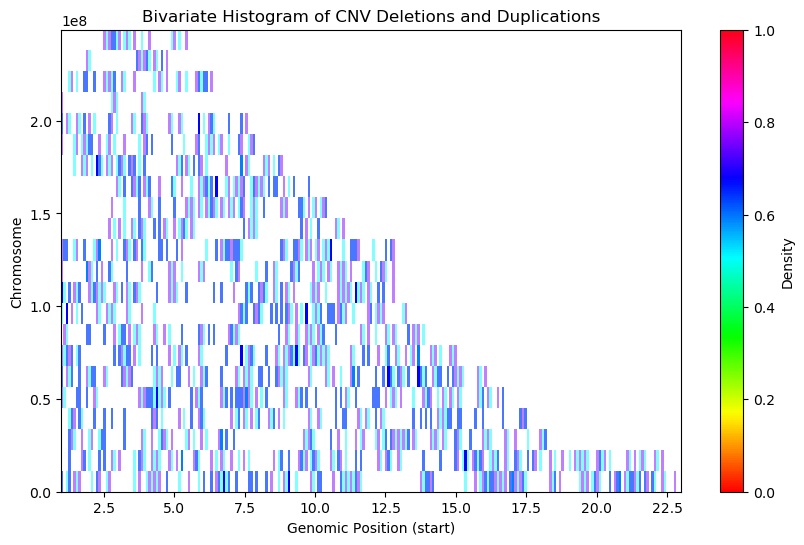

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

# Load the CNV data
cnv_data = pd.read_csv('/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/All-FInal.csv',sep =',')
#cnv_data = pd.read_csv('cnv_results.csv')

# Function to create a bivariate histogram with circular colormap
def plot_bivariate_histogram(cnv_data):
    # Define the bin edges
    bin_size = 1_000_000
    max_bin = int(cnv_data[['start', 'end']].max().max() // bin_size + 1) * bin_size
    bins = np.arange(0, max_bin + bin_size, bin_size)

    # Separate data by CNV type
    deletions = cnv_data[cnv_data['cnv_type'] == 'del']
    duplications = cnv_data[cnv_data['cnv_type'] == 'dup']

    # 2D histograms
    deletion_hist, xedges, yedges = np.histogram2d(deletions['chromosome'], deletions['start'], bins=[np.arange(1, cnv_data['chromosome'].max() + 2), bins])
    duplication_hist, _, _ = np.histogram2d(duplications['chromosome'], duplications['start'], bins=[np.arange(1, cnv_data['chromosome'].max() + 2), bins])

    # Normalize the histograms
    deletion_hist = deletion_hist / deletion_hist.max()
    duplication_hist = duplication_hist / duplication_hist.max()

    # Create a color array based on the histograms
    hue = (np.arctan2(duplication_hist, deletion_hist) / (2 * np.pi) + 0.5) % 1.0  # Hue based on the angle
    saturation = np.sqrt(deletion_hist**2 + duplication_hist**2)  # Saturation based on magnitude
    value = np.ones_like(hue)  # Value is constant

    hsv = np.stack((hue, saturation, value), axis=-1)
    rgb = hsv_to_rgb(hsv)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(rgb, aspect='auto', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

    ax.set_xlabel('Genomic Position (start)')
    ax.set_ylabel('Chromosome')
    ax.set_title('Bivariate Histogram of CNV Deletions and Duplications')

    plt.colorbar(plt.cm.ScalarMappable(cmap='hsv'), ax=ax, label='Density')
    plt.show()

# Plot the bivariate histogram
plot_bivariate_histogram(cnv_data)


In [12]:
import pandas as pd

# Load the CSV file
#file_path = 'your_file.csv'  # Replace with your file path
#df = pd.read_csv(file_path)


df = pd.read_csv('/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/resultsFIN.csv',sep =',')


# Assuming the scores are in a column named 'Score'
scores = df['length_kb']

# Counting the scores in each range
less_than_1 = len(scores[scores < 1])
between_1_and_10 = len(scores[(scores >= 1) & (scores < 10)])
between_10_and_100 = len(scores[(scores >= 10) & (scores < 100)])
above_100 = len(scores[scores >= 100])

# Printing the results
print(f"Number of scores less than 1: {less_than_1}")
print(f"Number of scores between 1 and 10: {between_1_and_10}")
print(f"Number of scores between 10 and 100: {between_10_and_100}")
print(f"Number of scores above 100: {above_100}")


Number of scores less than 1: 0
Number of scores between 1 and 10: 1
Number of scores between 10 and 100: 46
Number of scores above 100: 1462


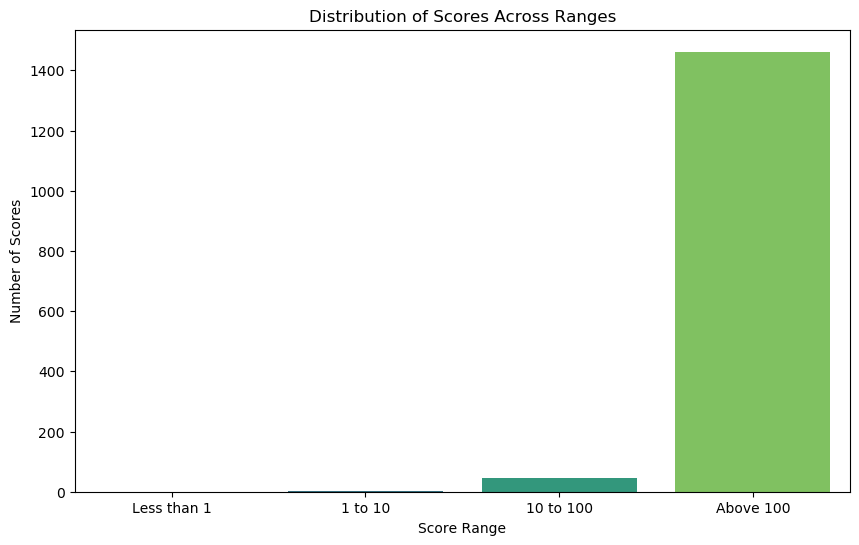

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file

df = pd.read_csv('/home/nick/Documents/TRIAL/CODES-FOR-GRAPHS/TRYS/my-pipeline/Viterbi-Code/my-vit-algorithm-using-for-thesis/GOOD/resultsFIN.csv',sep =',')

# Assuming the scores are in a column named 'Score'
scores = df['length_kb']

# Counting the scores in each range
score_ranges = {
    'Less than 1': len(scores[scores < 1]),
    '1 to 10': len(scores[(scores >= 1) & (scores < 10)]),
    '10 to 100': len(scores[(scores >= 10) & (scores < 100)]),
    'Above 100': len(scores[scores >= 100])
}

# Convert to a DataFrame for easier plotting
score_df = pd.DataFrame(list(score_ranges.items()), columns=['Range', 'Count'])

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Use seaborn to create a bar plot
sns.barplot(x='Range', y='Count', data=score_df, palette='viridis')

# Add title and labels
plt.title('Distribution of Scores Across Ranges')
plt.xlabel('Score Range')
plt.ylabel('Number of Scores')

# Show the plot
plt.show()


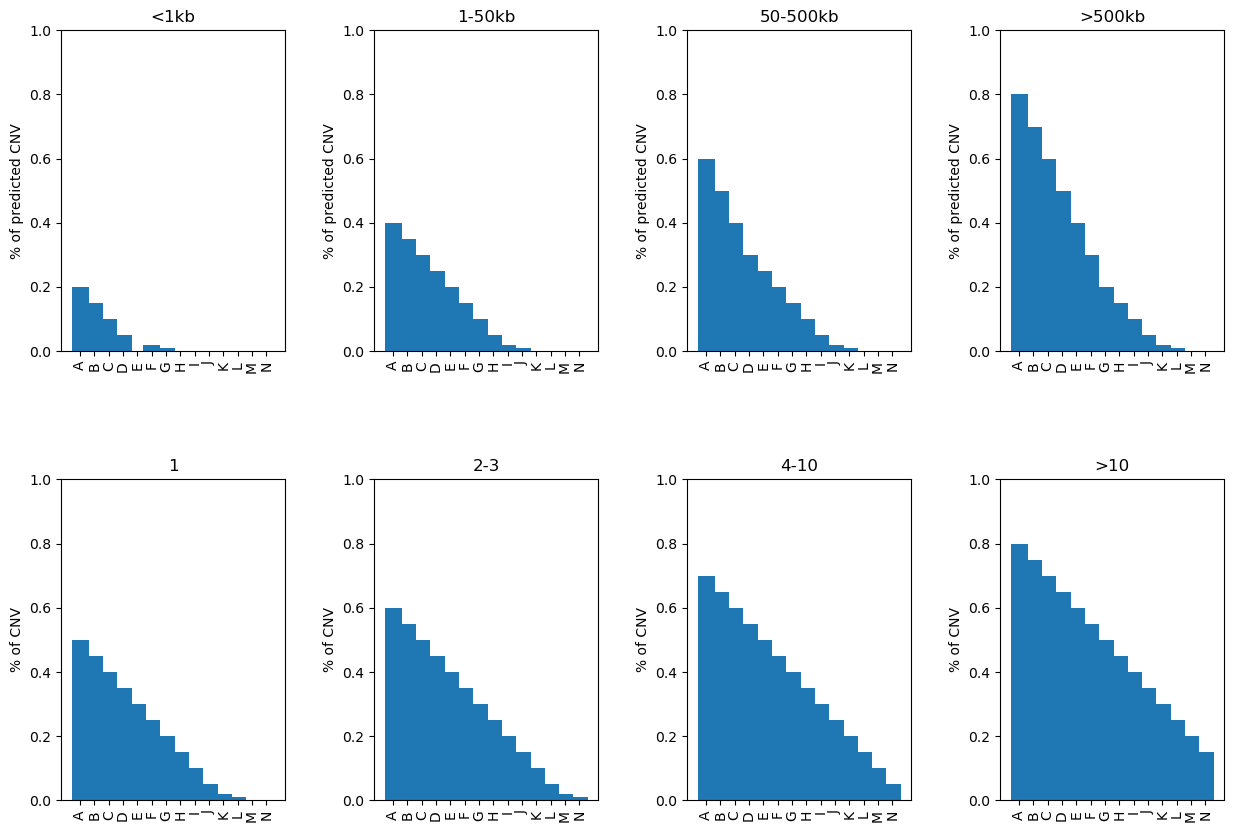

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
categories = ['A', 'B', 'C', 'D', 'E', 'F', 
              'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
percentages_a = {
    '<1kb': [0.2, 0.15, 0.1, 0.05, 0.0, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    '1-50kb': [0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0],
    '50-500kb': [0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.0, 0.0, 0.0],
    '>500kb': [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.0, 0.0]
}
percentages_b = {
    '1': [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.0, 0.0],
    '2-3': [0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01],
    '4-10': [0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05],
    '>10': [0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15]
}

x = np.arange(len(categories))
width = 1.2  # the width of the bars

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plotting 'a' data
for i, (label, data) in enumerate(percentages_a.items()):
    axs[0, i].bar(x, data, width)
    axs[0, i].set_title(label)
    axs[0, i].set_xticks(x)
    axs[0, i].set_xticklabels(categories, rotation=90)
    axs[0, i].set_ylim(0, 1)
    axs[0, i].set_ylabel('% of predicted CNV')

# Plotting 'b' data
for i, (label, data) in enumerate(percentages_b.items()):
    axs[1, i].bar(x, data, width)
    axs[1, i].set_title(label)
    axs[1, i].set_xticks(x)
    axs[1, i].set_xticklabels(categories, rotation=90)
    axs[1, i].set_ylim(0, 1)
    axs[1, i].set_ylabel('% of CNV')

plt.show()


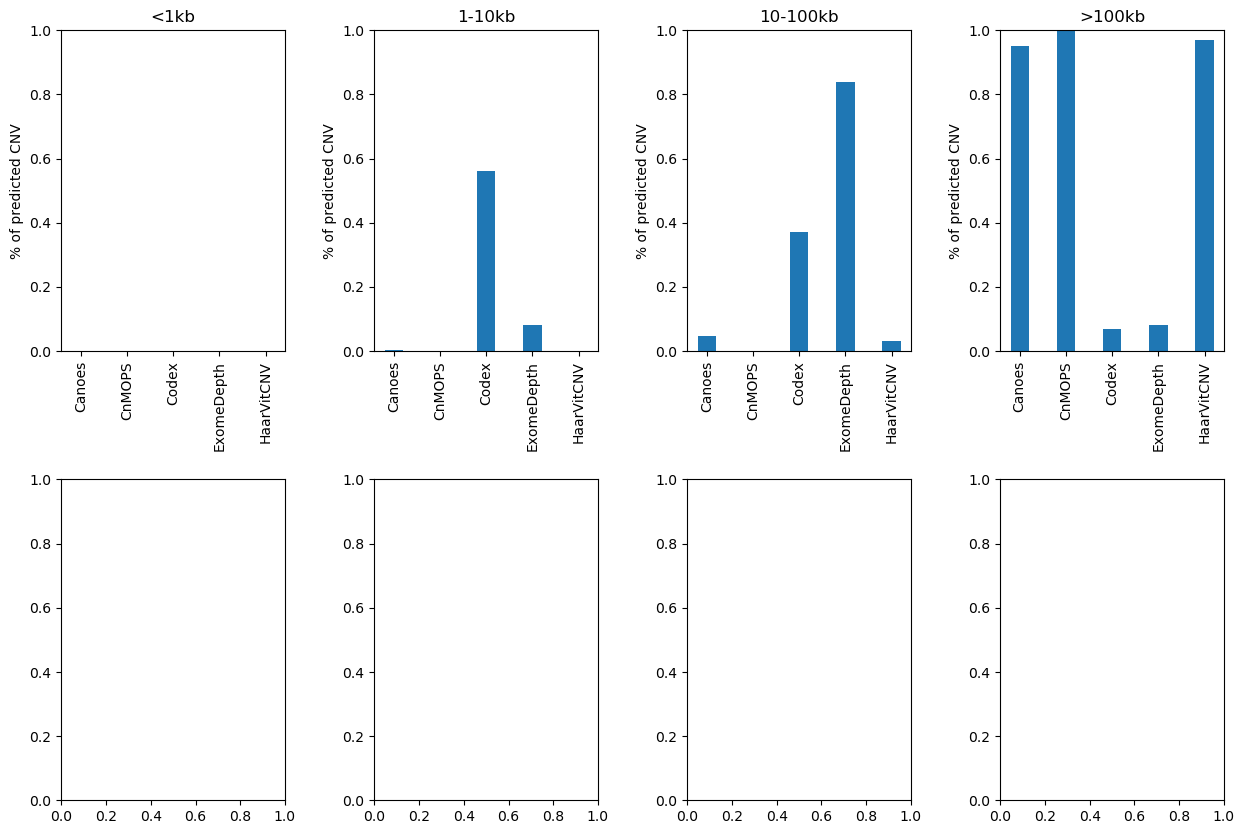

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
categories = ['Canoes', 'CnMOPS', 'Codex', 'ExomeDepth', 'HaarVitCNV']
percentages_a = {
    '<1kb': [0.0005, 0, 0, 0,0 ],
    '1-10kb': [0.005, 0, 0.56, 0.08, 0.0007],
    '10-100kb': [0.046, 0, 0.37, 0.84, 0.03],
    '>100kb': [0.95, 1, 0.07, 0.08, 0.97]
}
#percentages_b = {
#    '1': [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.0, 0.0],
#    '2-3': [0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01],
#    '4-10': [0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05],
#    '>10': [0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15]
#}

x = np.arange(len(categories))
width = 0.4  # the width of the bars

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plotting 'a' data
for i, (label, data) in enumerate(percentages_a.items()):
    axs[0, i].bar(x, data, width)
    axs[0, i].set_title(label)
    axs[0, i].set_xticks(x)
    axs[0, i].set_xticklabels(categories, rotation=90)
    axs[0, i].set_ylim(0, 1)
    axs[0, i].set_ylabel('% of predicted CNV')

# Plotting 'b' data
#for i, (label, data) in enumerate(percentages_b.items()):
#    axs[1, i].bar(x, data, width)
#    axs[1, i].set_title(label)
#    axs[1, i].set_xticks(x)
#    axs[1, i].set_xticklabels(categories, rotation=90)
#    axs[1, i].set_ylim(0, 1)
#    axs[1, i].set_ylabel('% of CNV')

plt.show()


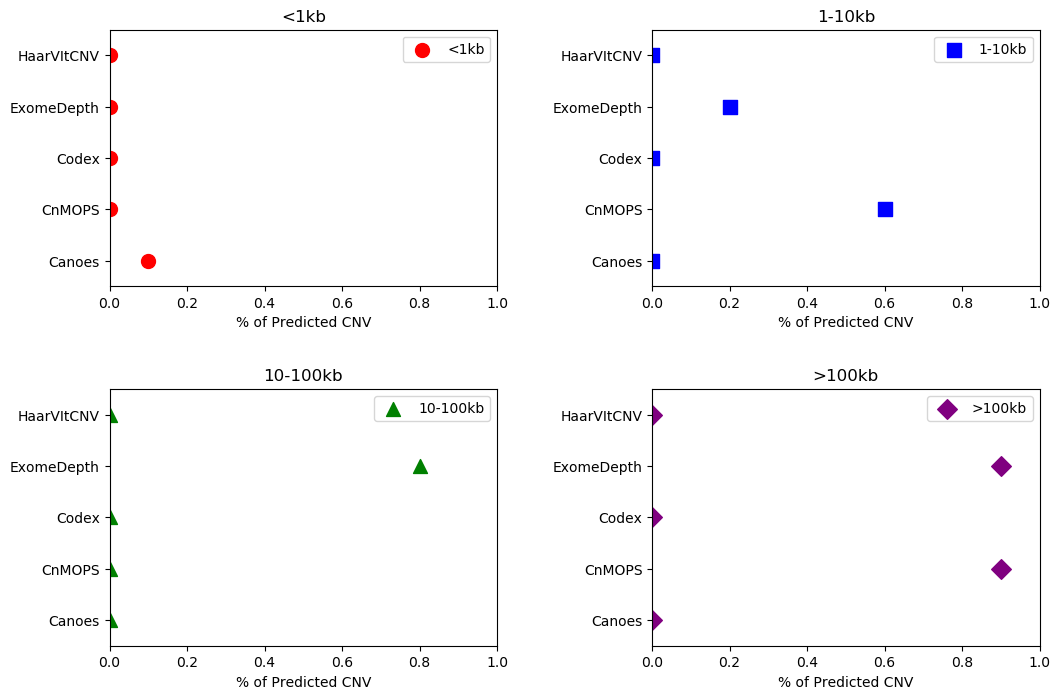

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
categories = ['Canoes', 'CnMOPS', 'Codex', 'ExomeDepth', 'HaarVItCNV']
ranges = ['<1kb', '1-10kb', '10-100kb', '>100kb']
percentages = {
    '<1kb': [0.1, 0.0, 0.0, 0.0, 0.0],
    '1-10kb': [0.0, 0.6, 0.0, 0.2, 0.0],
    '10-100kb': [0.0, 0.0, 0.0, 0.8, 0.0],
    '>100kb': [0.0, 0.9, 0.0, 0.9, 0.0]
}

colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', '^', 'D']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, (range_label, data) in enumerate(percentages.items()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    for j, (value, category) in enumerate(zip(data, categories)):
        ax.scatter(value, category, color=colors[i], marker=markers[i], s=100, label=range_label if j == 0 else "")

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, len(categories) - 0.5)
    ax.set_yticks(range(len(categories)))
    ax.set_yticklabels(categories)
    ax.set_title(range_label)
    ax.set_xlabel('% of Predicted CNV')
    ax.legend()

plt.show()


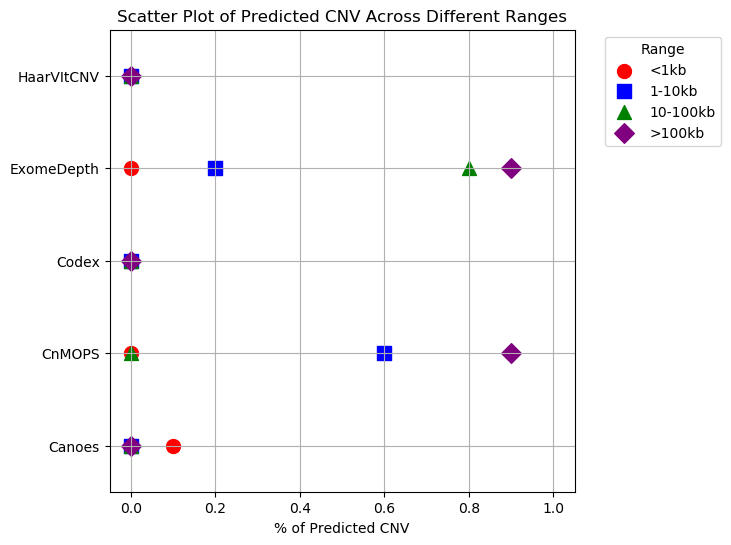

In [23]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
categories = ['Canoes', 'CnMOPS', 'Codex', 'ExomeDepth', 'HaarVItCNV']
percentages = {
    '<1kb': [0.1, 0.0, 0.0, 0.0, 0.0],
    '1-10kb': [0.0, 0.6, 0.0, 0.2, 0.0],
    '10-100kb': [0.0, 0.0, 0.0, 0.8, 0.0],
    '>100kb': [0.0, 0.9, 0.0, 0.9, 0.0]
}

colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(6, 6))

for i, (range_label, data) in enumerate(percentages.items()):
    for j, (value, category) in enumerate(zip(data, categories)):
        plt.scatter(value, category, color=colors[i], marker=markers[i], s=100, label=range_label if j == 0 else "")

plt.xlim(-0.05, 1.05)  # Add a small margin to see the 0 values
plt.ylim(-0.5, len(categories) - 0.5)
plt.yticks(range(len(categories)), categories)
plt.xlabel('% of Predicted CNV')
plt.title('Scatter Plot of Predicted CNV Across Different Ranges')

# Move the legend outside the plot box
plt.legend(title='Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


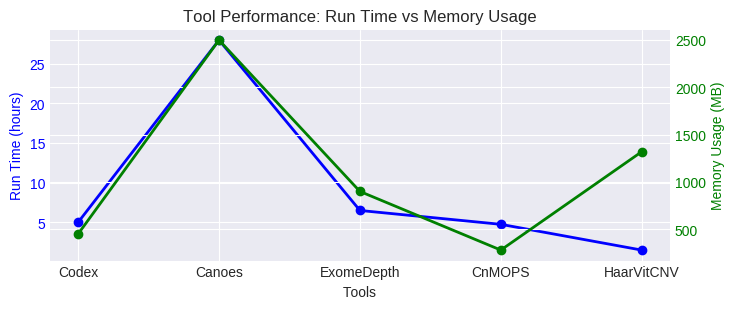

In [32]:
import matplotlib.pyplot as plt

# Tool names
tools = ['Codex', 'Canoes', 'ExomeDepth', 'CnMOPS', 'HaarVitCNV']

# Run times in hours
run_times = [5, 28, 6.5, 4.75, 1.5]  # Tool B = 1 day 4 hours = 24 + 4 = 28 hours

# Memory usage in MB
memory_usage = [450, 2500, 900, 280, 1320]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 3))

# Plot run times on the left y-axis
ax1.plot(tools, run_times, marker='o', color='blue', label='Run Time (hours)', linewidth=2)
ax1.set_xlabel('Tools')
ax1.set_ylabel('Run Time (hours)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot memory usage
ax2 = ax1.twinx()
ax2.plot(tools, memory_usage, marker='o', color='green', label='Memory Usage (MB)', linewidth=2)
ax2.set_ylabel('Memory Usage (MB)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and grid
plt.title('Tool Performance: Run Time vs Memory Usage')
ax1.grid(True)

# Show plot
plt.show()


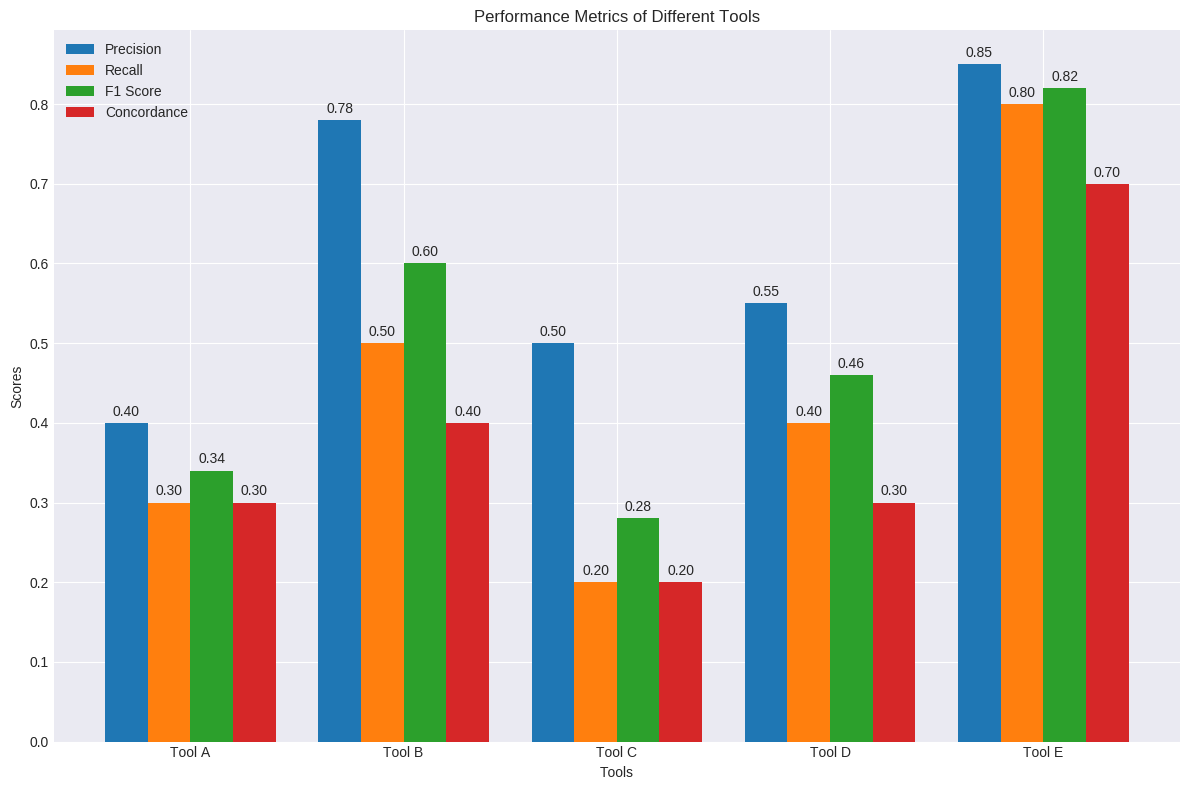

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Tool names
tools = ['Tool A', 'Tool B', 'Tool C', 'Tool D', 'Tool E']

# Metrics
precision = [0.40, 0.78, 0.50, 0.55, 0.85]
recall = [0.30, 0.50, 0.20, 0.40, 0.80]
f1_score = [0.34, 0.60, 0.28, 0.46, 0.82]
concordance = [0.30, 0.40, 0.20, 0.30, 0.70]

# X-axis locations for each group
x = np.arange(len(tools))

# Width of bars
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each metric
bars1 = ax.bar(x - width*1.5, precision, width, label='Precision')
bars2 = ax.bar(x - width*0.5, recall, width, label='Recall')
bars3 = ax.bar(x + width*0.5, f1_score, width, label='F1 Score')
bars4 = ax.bar(x + width*1.5, concordance, width, label='Concordance')

# Adding labels and titles
ax.set_xlabel('Tools')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Tools')
ax.set_xticks(x)
ax.set_xticklabels(tools)
ax.legend()

# Adding value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

plt.tight_layout()
plt.show()


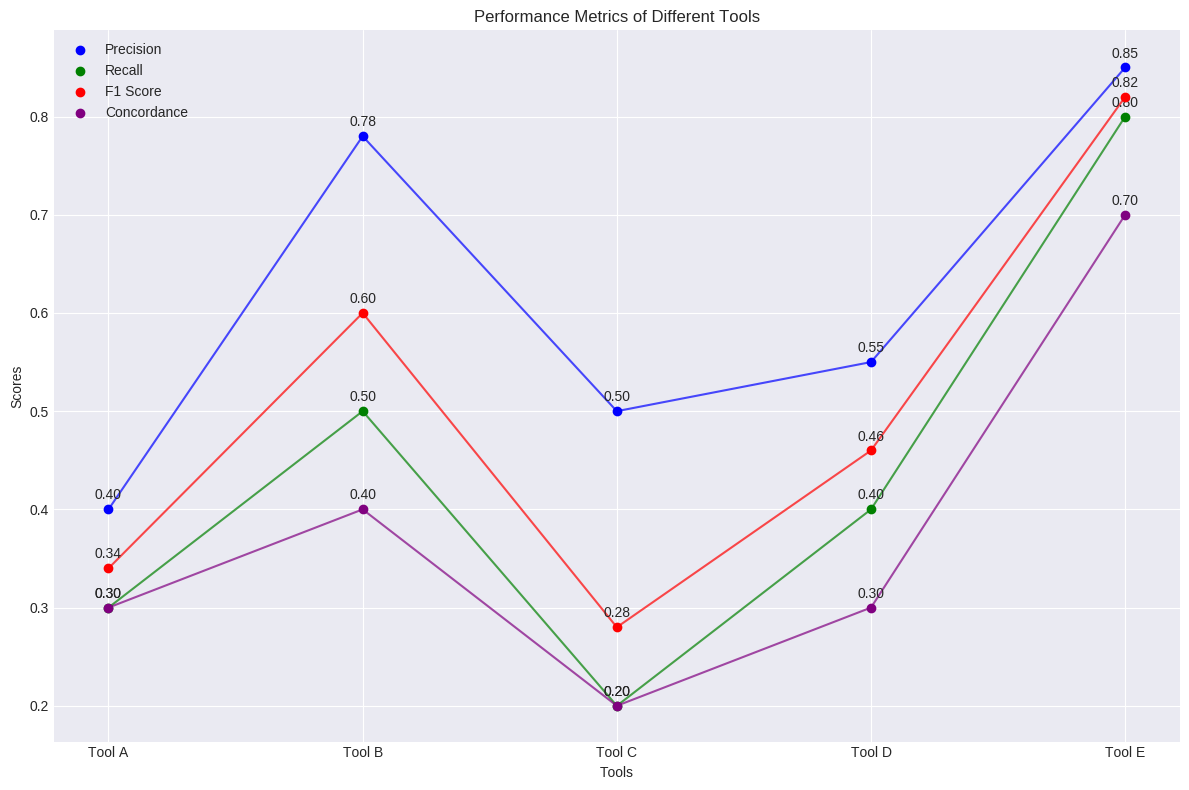

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Tool names
tools = ['Tool A', 'Tool B', 'Tool C', 'Tool D', 'Tool E']

# Metrics
precision = [0.40, 0.78, 0.50, 0.55, 0.85]
recall = [0.30, 0.50, 0.20, 0.40, 0.80]
f1_score = [0.34, 0.60, 0.28, 0.46, 0.82]
concordance = [0.30, 0.40, 0.20, 0.30, 0.70]

# X-axis locations for each group
x = np.arange(len(tools))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter and line plots for each metric
ax.scatter(x, precision, color='blue', label='Precision', zorder=5)
ax.plot(x, precision, color='blue', linestyle='-', alpha=0.7)

ax.scatter(x, recall, color='green', label='Recall', zorder=5)
ax.plot(x, recall, color='green', linestyle='-', alpha=0.7)

ax.scatter(x, f1_score, color='red', label='F1 Score', zorder=5)
ax.plot(x, f1_score, color='red', linestyle='-', alpha=0.7)

ax.scatter(x, concordance, color='purple', label='Concordance', zorder=5)
ax.plot(x, concordance, color='purple', linestyle='-', alpha=0.7)

# Adding labels and titles
ax.set_xlabel('Tools')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Tools')
ax.set_xticks(x)
ax.set_xticklabels(tools)
ax.legend()

# Adding value labels on top of scatter points
def add_labels(x_data, y_data):
    for i, value in enumerate(y_data):
        ax.annotate(f'{value:.2f}',
                    xy=(x_data[i], value),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(x, precision)
add_labels(x, recall)
add_labels(x, f1_score)
add_labels(x, concordance)

plt.tight_layout()
plt.show()


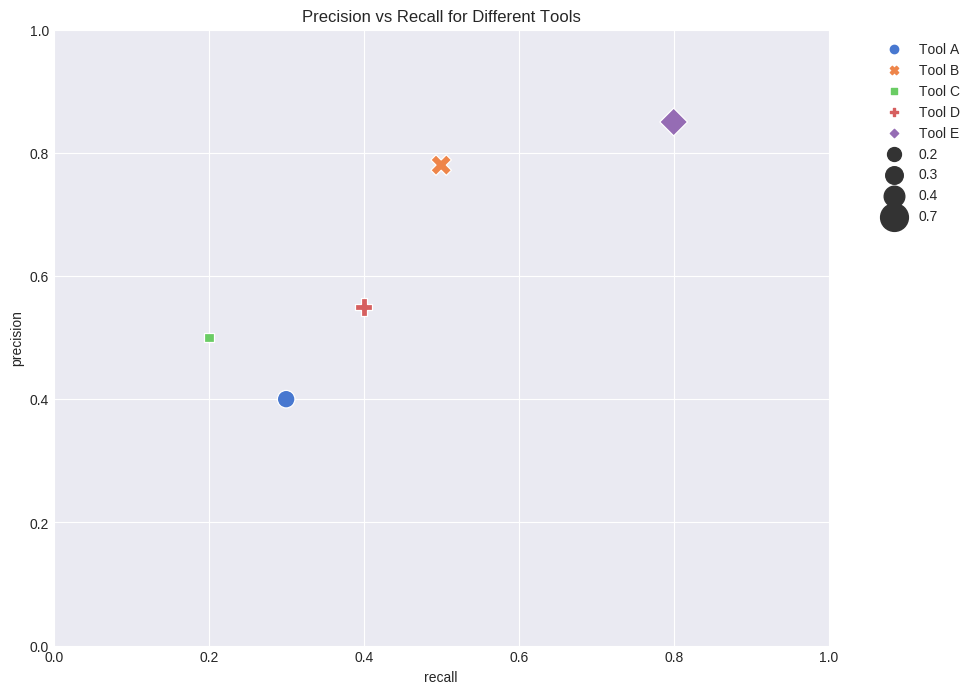

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the tools
tools = ['Tool A', 'Tool B', 'Tool C', 'Tool D', 'Tool E']
precision = [0.40, 0.78, 0.5, 0.55, 0.85]
recall = [0.3, 0.5, 0.2, 0.4, 0.8]
f1_score = [0.34, 0.6, 0.28, 0.46, 0.82]
concordance = [0.3, 0.4, 0.2, 0.3, 0.7]

# Set the figure size
plt.figure(figsize=(10, 8))

# Plotting precision vs recall using seaborn scatterplot
sns.scatterplot(x=recall, y=precision, hue=tools, size=concordance, sizes=(100, 400), style=tools, palette="muted")

# Set the limits of the graph
plt.xlim(0, 1)
plt.ylim(0, 1)

# Labeling axes
plt.xlabel('recall')
plt.ylabel('precision')

# Title of the graph
plt.title('Precision vs Recall for Different Tools')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['A', 'B', 'C', 'D']
values_per_category = [10, 20, 30, 20]
labels = [f'Mister {i}' for i in range(1, 61)]
values = np.random.randint(10, 80, 60)  # Example random values

# Number of bars
N = len(labels)

# Create the angle for each bar
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Width of each bar
width = 2 * np.pi / N

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

# Colors for the categories
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

# Loop through categories and plot each segment
start = 0
for i, category in enumerate(categories):
    num_bars = values_per_category[i]
    bars = ax.bar(angles[start:start + num_bars], values[start:start + num_bars], width=width,
                  color=colors[i], align='edge', edgecolor='white')
    # Add labels to bars
    for bar, label, angle in zip(bars, labels[start:start + num_bars], angles[start:start + num_bars]):
        rotation = np.rad2deg(angle)  # Convert radian to degree for text rotation
        alignment = 'left' if np.pi/2 <= angle < 3*np.pi/2 else 'right'  # Adjust text alignment based on position
        ax.text(angle, bar.get_height() + 5, label, ha=alignment, va='center', rotation=rotation,
                rotation_mode='anchor')
    start += num_bars

# Remove the labels on the y-axis (for cleaner look)
ax.set_yticklabels([])

# Set the title
ax.set_title('Circular Bar Plot Example', size=20)

# Show the plot
plt.show()


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1000x1000 with 0 Axes>